## THE COMPLETE GUIDE PREPROCESSING

### STEP 1: LOADING THE DATASET

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml # dataset avaialable from sktlearn
np.random.seed(0)

In [15]:

"""
The target label is 'survival' -> 0 = No, 1 = Yes
"""
X, y = fetch_openml('titanic', version=1, return_X_y=True, as_frame=True)
X


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


##### 1A. CHECK THE DATA TYPES 

In [16]:
"""
- pclass is int64 SHOULD BE ordinal
- 5 features containt MISSING VALUES 'age', 'cabin', 'boat', 'body', 'homde.dest'
"""
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


#### 1B. CLEANSING DATA

In [17]:
"""
- DROP IRRELEVANT DATA (name, ticket, cabin, boat, body and home.dest) -> 'boat' and 'body' are 
  the the target label (prediction). Since we know that any passenger with boat number
  is survived, and any passenger with a body identification number did not survive
"""
X.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True) # axis=1 'drop column', inplace=True -> affect original dataframe, 'False' generate a new dataframe
X


,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C
1305,3,female,NaN,1,0,14.4542,C
1306,3,male,26.5000,0,0,7.2250,C
1307,3,male,27.0000,0,0,7.2250,C


#### 1C. EXPLOATORY DATA ANALYSIS (EDA)

pclass         int64
sex         category
age          float64
sibsp          int64
parch          int64
fare         float64
embarked    category
survived     float64
dtype: object


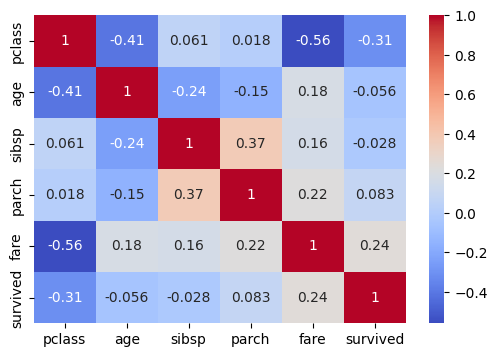

In [18]:
"""
- Find the FEATURES CORRELATION using Headmap
"""

# merge input features (X) and target label (y)
df = pd.concat([X, y.astype('float')], axis=1)
print(df.dtypes)

# Plot heatmap
df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(6, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm') # annot=True show the value on the cells, 'FALSE' hide
plt.show()
